### Listing 3.1 Loading the IMDB (Internet Movie Database) dataset

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [15]:
train_data.shape

(25000,)

In [16]:
train_labels.shape

(25000,)

#### Getting the maximum index from the tensor full of word indices (quick and short-cut way)

In [3]:
max([max(sequence) for sequence in train_data])

9999

#### Getting the maximum index from the tensor full of word indices (long and "explained" version by me)

In [4]:
arr = list()
for sequence in train_data:
    arr.append(max(sequence))

print(max(arr))

9999


#### Decoding word indices to their words

In [5]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
# Decode the review. Note that the indices are offset by 3 
# because 0, 1 and 2 are reserved indices for "padding", "start of 
# sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Listing 3.2 Encoding the Integer sequences into a binary matrix

In [8]:
import numpy as np

In [9]:
def vectorise_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
x_train = vectorise_sequence(train_data)
x_test = vectorise_sequence(test_data)

In [11]:
x_train.shape

(25000, 10000)

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
y_train.shape

(25000,)

### Listing 3.3 The model definition

In [17]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()

In [19]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

In [20]:
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Listing 3.4 Compiling the model

In [21]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Listing 3.7 Setting aside a validation set

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [23]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Listing 3.8 Training the model

In [24]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.5305 - acc: 0.7848 - val_loss: 0.3827 - val_acc: 0.8723
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2945 - acc: 0.9037 - val_loss: 0.2929 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2107 - acc: 0.9291 - val_loss: 0.3294 - val_acc: 0.8655
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1660 - acc: 0.9421 - val_loss: 0.2774 - val_acc: 0.8879
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1313 - acc: 0.9571 - val_loss: 0.3081 - val_acc: 0.8812
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1056 - acc: 0.9671 - val_loss: 0.3088 - val_acc: 0.8845
Epoch 7/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0840 - acc: 0.9757 - val_loss: 0.3553 - 

#### Viewing the history object stored in the previous step

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Listing 3.9 Plotting the training and validation loss

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

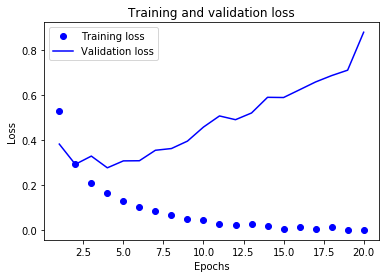

In [27]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' means blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' means solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Listing 3.10 Plotting the training and validation accuracy

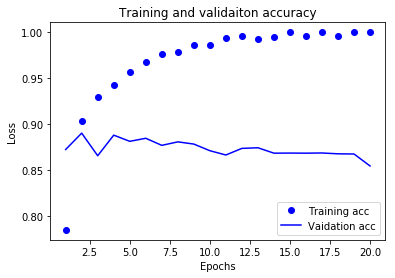

In [28]:
plt.clf() # Clears the figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Vaidation acc')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Listing 3.11 Retraining a model from scratch

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4732 - acc: 0.8203
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2637 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1997 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [30]:
results

[0.3248909763622284, 0.87224]

In [31]:
model.predict(x_test)

array([[0.1376625 ],
       [0.9997454 ],
       [0.2689802 ],
       ...,
       [0.07298045],
       [0.04687047],
       [0.47117677]], dtype=float32)